<h1><center>Rainfall Prediction</center></h1>


## Importing the Libraries

In [1]:
# importing the required libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

## Reading the Data

In [2]:
# reading the data
data = pd.read_csv("rainfall in india 1901-2015.csv")
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


## Data Analysis and Visualisation

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [4]:
data.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data['SUBDIVISION'].value_counts()

WEST MADHYA PRADESH                   115
EAST RAJASTHAN                        115
COASTAL KARNATAKA                     115
TAMIL NADU                            115
RAYALSEEMA                            115
TELANGANA                             115
COASTAL ANDHRA PRADESH                115
CHHATTISGARH                          115
VIDARBHA                              115
MATATHWADA                            115
MADHYA MAHARASHTRA                    115
KONKAN & GOA                          115
SAURASHTRA & KUTCH                    115
GUJARAT REGION                        115
EAST MADHYA PRADESH                   115
KERALA                                115
WEST RAJASTHAN                        115
SOUTH INTERIOR KARNATAKA              115
JAMMU & KASHMIR                       115
HIMACHAL PRADESH                      115
PUNJAB                                115
HARYANA DELHI & CHANDIGARH            115
UTTARAKHAND                           115
WEST UTTAR PRADESH                

In [7]:
data.mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_12920\531903386.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


YEAR       1958.218659
JAN          18.957320
FEB          21.805325
MAR          27.359197
APR          43.127432
MAY          85.745417
JUN         230.234444
JUL         347.214334
AUG         290.263497
SEP         197.361922
OCT          95.507009
NOV          39.866163
DEC          18.870580
ANNUAL     1411.008900
Jan-Feb      40.747786
Mar-May     155.901753
Jun-Sep    1064.724769
Oct-Dec     154.100487
dtype: float64

In [8]:
# filling na values with mean
data = data.fillna(data.mean())

C:\Users\hp\AppData\Local\Temp\ipykernel_12920\4278693336.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


In [9]:
data.head(3)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6


In [10]:
data.isnull().any()

SUBDIVISION    False
YEAR           False
JAN            False
FEB            False
MAR            False
APR            False
MAY            False
JUN            False
JUL            False
AUG            False
SEP            False
OCT            False
NOV            False
DEC            False
ANNUAL         False
Jan-Feb        False
Mar-May        False
Jun-Sep        False
Oct-Dec        False
dtype: bool

In [11]:
data.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       1943, 1944, 1945, 1948, 1909], dtype=int64)

In [12]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.569044,35.896396,46.925176,67.798192,123.189974,234.568120,269.310313,188.678707,135.309591,99.434452,68.593545,42.318098,900.986632,59.265023,201.096692,706.881054,166.678751
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.475000,175.900000,156.150000,100.600000,14.600000,0.700000,0.100000,806.450000,4.100000,24.200000,574.375000,34.200000
50%,1958.000000,6.000000,6.700000,7.900000,15.700000,36.700000,138.900000,284.900000,259.500000,174.100000,65.750000,9.700000,3.100000,1125.450000,19.300000,75.200000,882.250000,98.800000
75%,1987.000000,22.125000,26.800000,31.225000,49.825000,96.825000,304.950000,418.225000,377.725000,265.725000,148.300000,45.825000,17.700000,1635.100000,50.300000,196.900000,1287.550000,212.600000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [13]:
data.shape

(4116, 19)

## Data Visualization

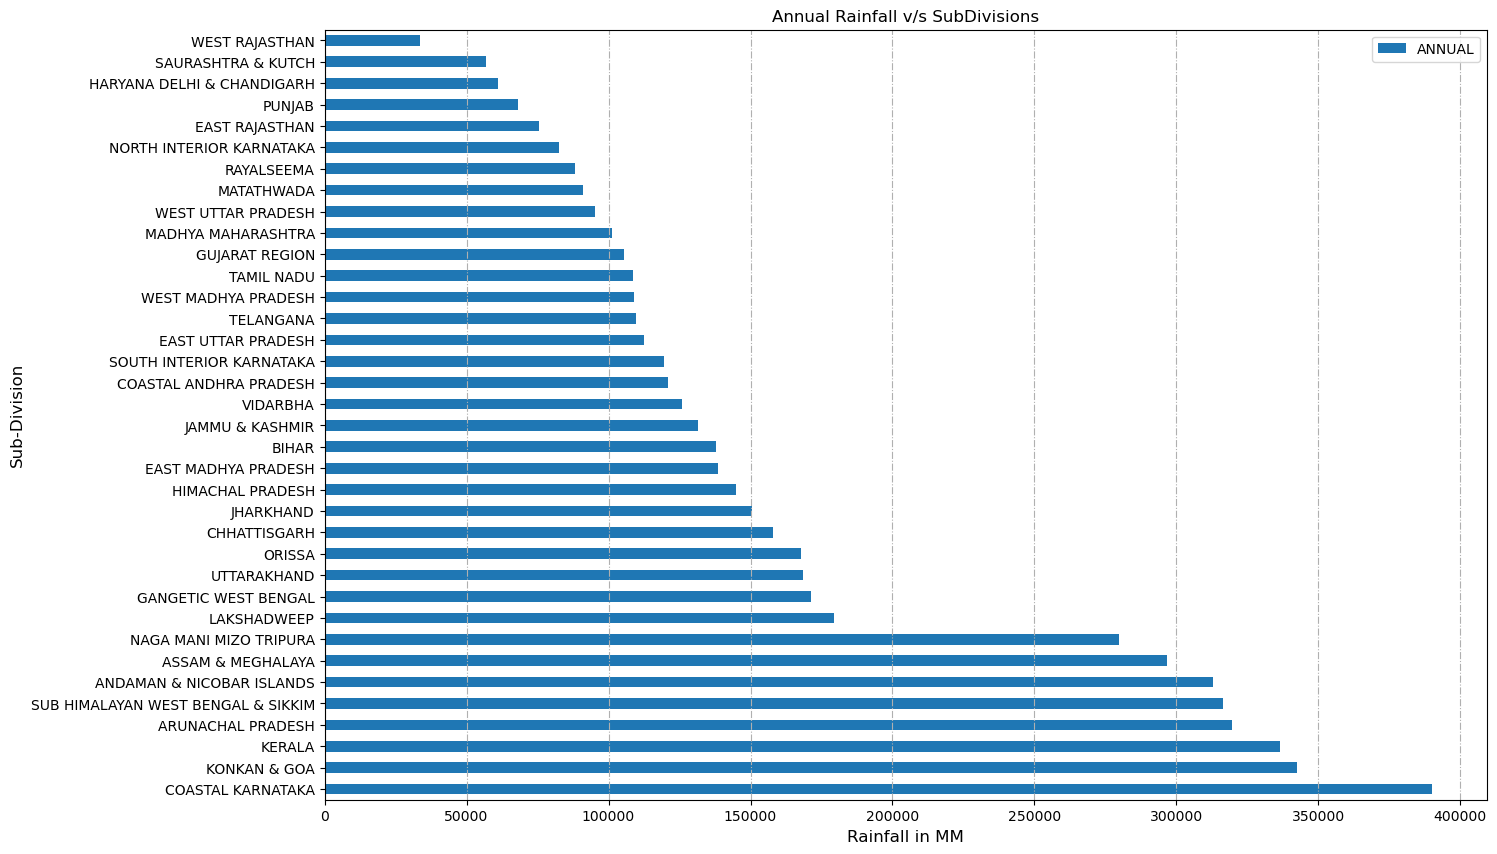

In [14]:
data[["SUBDIVISION","ANNUAL"]].groupby("SUBDIVISION").sum().sort_values(by='ANNUAL',ascending=False).plot(kind='barh',stacked=True,figsize=(15,10))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.title("Annual Rainfall v/s SubDivisions")
plt.grid(axis="x",linestyle="-.")
plt.show()

`Above plot shows the total rainfall from year 1901-2015 in each subdivision,
 from the above plot we note that:-
 1)west Rajasthan,punjab,delhi have recieved the least rainfall
 2)Rainfall was more in western states tripura,meghalaya,Arunachal Pradesh,kerala,Goa,karnatka,and also in Andaman`

C:\Users\hp\AppData\Local\Temp\ipykernel_12920\1943680871.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("YEAR").sum()['ANNUAL'].plot(kind="line",color="r",marker=".")


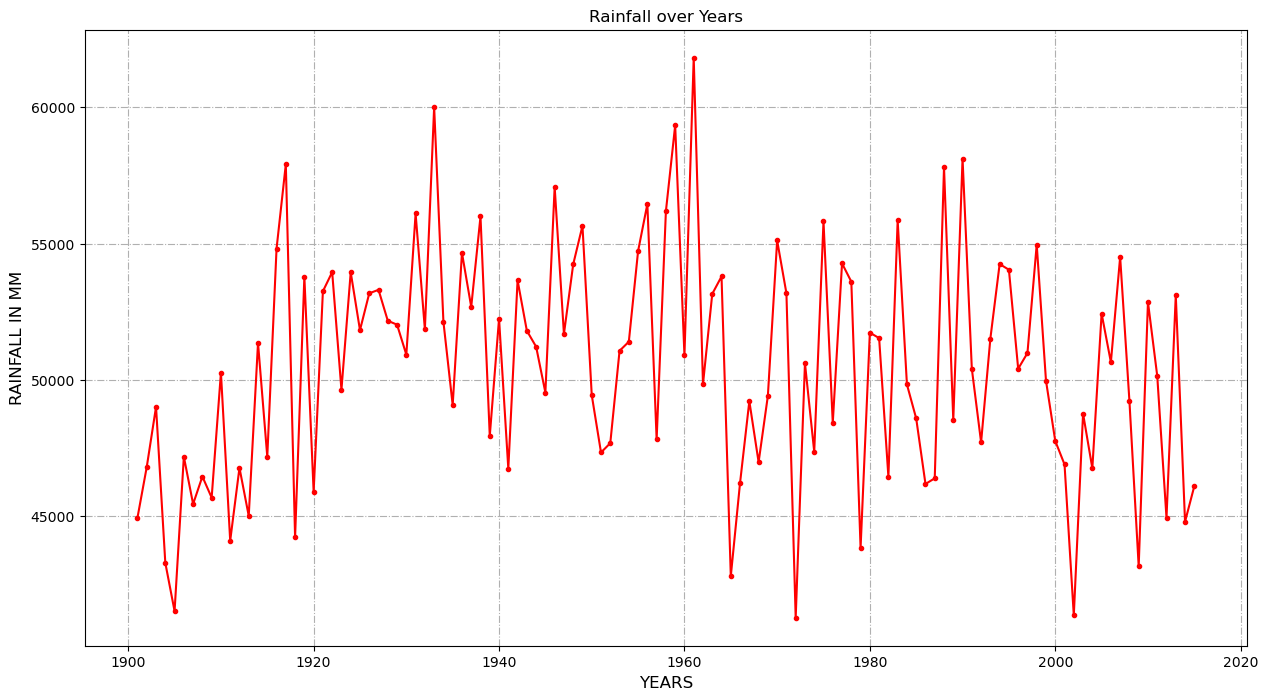

In [15]:
plt.figure(figsize=(15,8))
data.groupby("YEAR").sum()['ANNUAL'].plot(kind="line",color="r",marker=".")
plt.xlabel("YEARS",size=12)
plt.ylabel("RAINFALL IN MM",size=12)
plt.grid(axis="both",linestyle="-.")
plt.title("Rainfall over Years")
plt.show()

`Above graph shows the Rainfall from 1901-2015 in India,
 we observe that :-
 1)The maximum Rainfall was in 1950s`

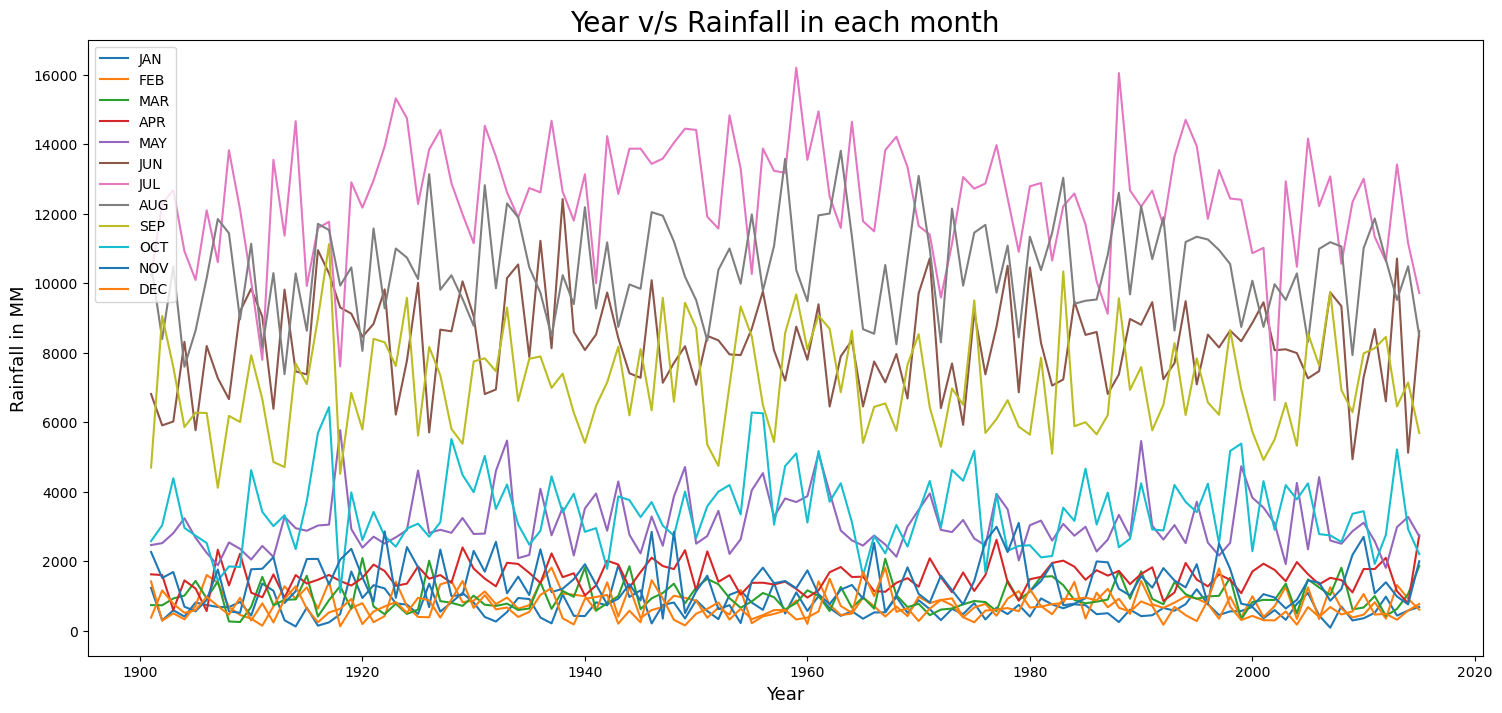

In [16]:
data[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP',
      'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(kind="line",figsize=(18,8))
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.title("Year v/s Rainfall in each month",size=20)
plt.show()

`Above plot shows the Year vs Rainfall in each month,
 we observe that:-
 1)July has heavy rainfall 
 2)Feb has least rainfall `

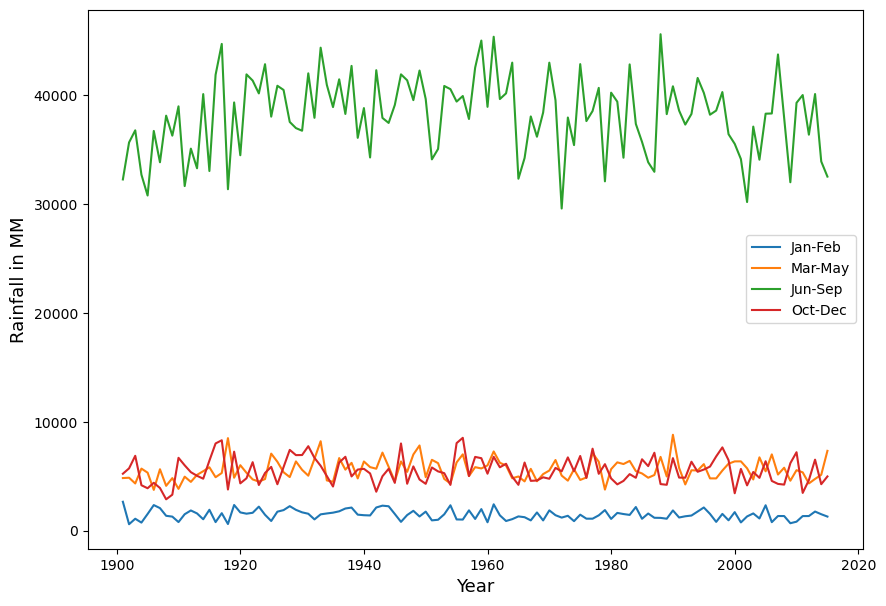

In [17]:
data[['YEAR','Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(10,7))
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.show()

`From Above Graph we observe that :-
 1)combined jun,july,august,sept recieves huge rainfall
 2)combined jan,feb recieves least Rainfall`

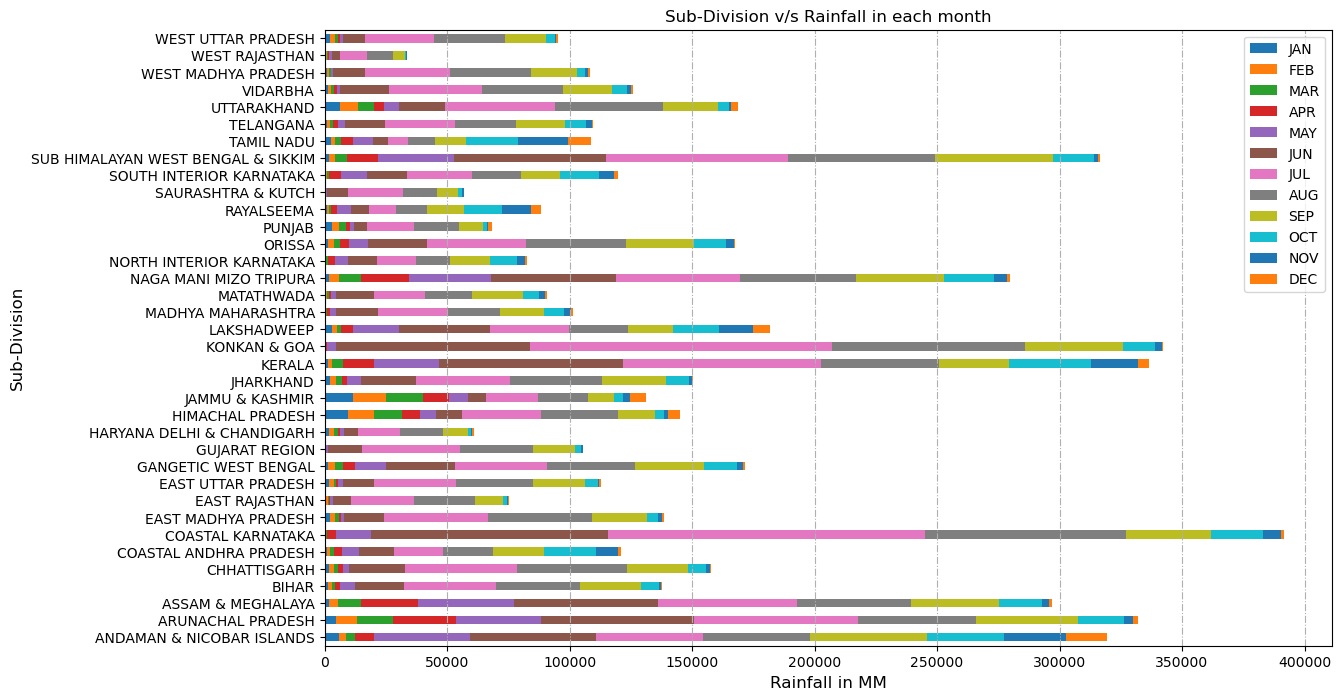

In [18]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").sum().plot(kind="barh",stacked=True,figsize=(13,8))
plt.title("Sub-Division v/s Rainfall in each month")
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.grid(axis="x",linestyle="-.")
plt.show()

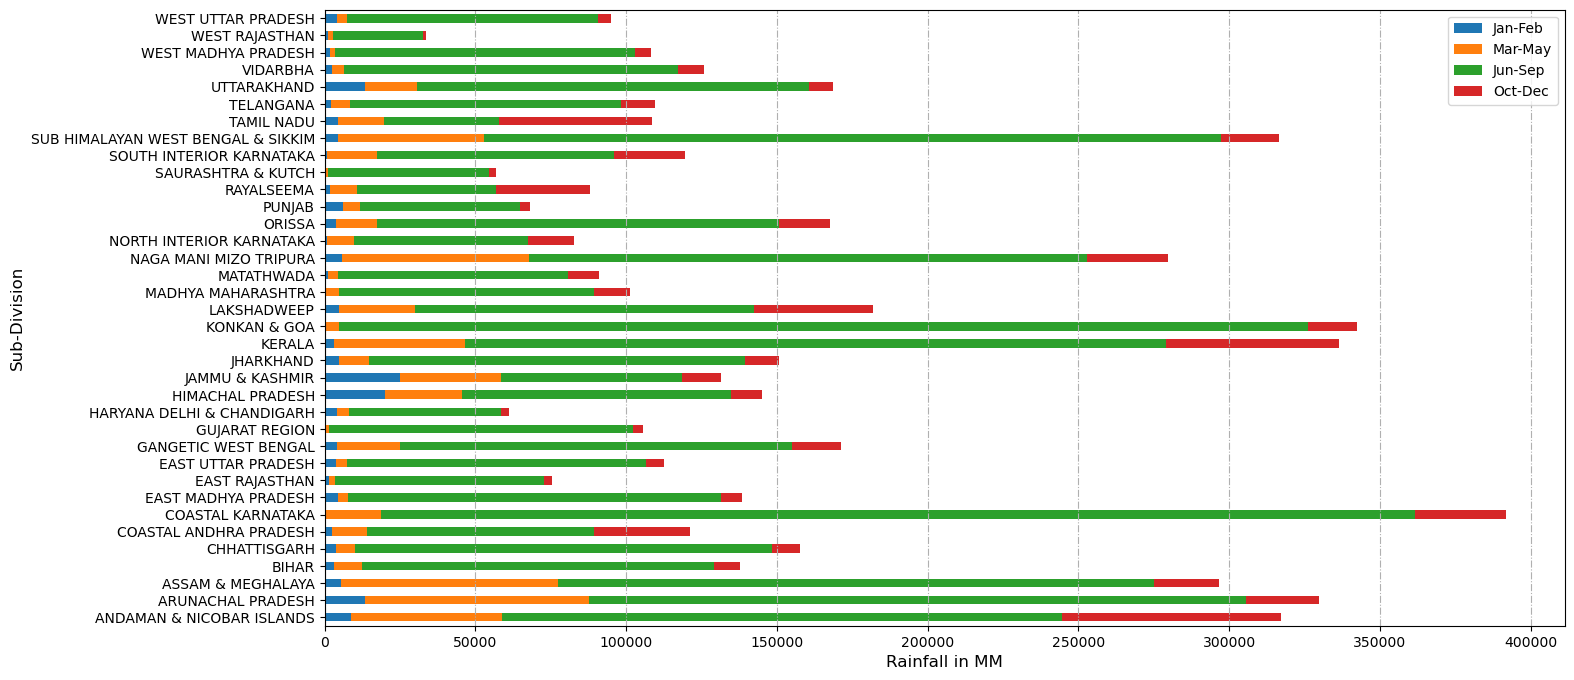

In [19]:
data[['SUBDIVISION', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").sum().plot(kind="barh",stacked=True,figsize=(16,8))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.grid(axis="x",linestyle="-.")
plt.show()

`From the above two graph we observe that:-
    1)eastern states have good amont of rainfall in march,april,may`

In [20]:
# Analysis of rainfall data of tamil nadu
UP = data.loc[((data['SUBDIVISION'] == 'WEST UTTAR PRADESH'))]
UP.head(4)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
1127,WEST UTTAR PRADESH,1901,51.4,25.6,9.5,0.7,5.6,23.8,201.9,374.3,67.7,7.6,0.0,7.9,775.9,76.9,15.8,667.7,15.4
1128,WEST UTTAR PRADESH,1902,4.6,4.6,0.6,4.8,7.2,54.5,325.9,180.6,143.1,9.6,0.9,0.2,736.6,9.2,12.7,704.1,10.6
1129,WEST UTTAR PRADESH,1903,13.4,0.4,1.2,0.0,8.2,32.7,145.4,279.1,150.4,177.3,0.0,0.4,808.4,13.7,9.4,607.6,177.6
1130,WEST UTTAR PRADESH,1904,6.3,2.0,29.7,0.4,24.8,68.5,358.8,311.1,97.1,2.7,15.7,28.2,945.2,8.2,54.9,835.5,46.6


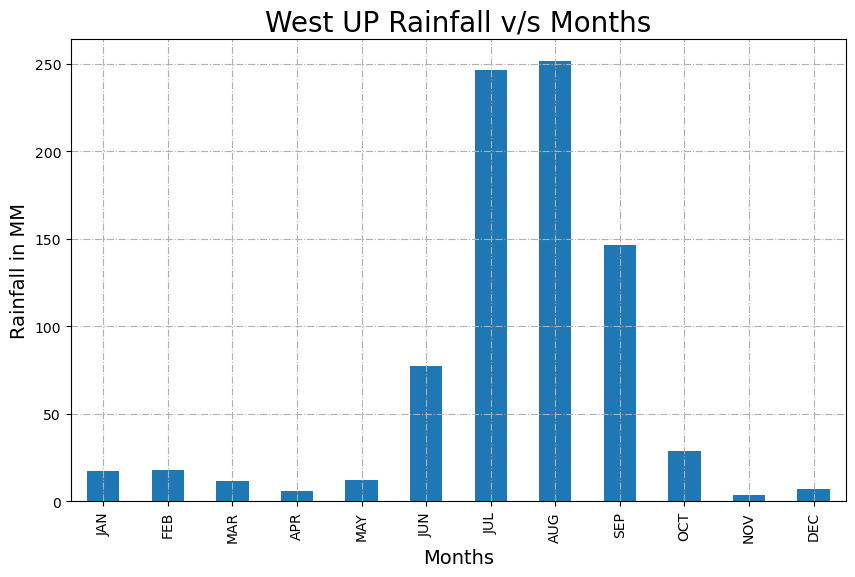

In [21]:
plt.figure(figsize=(10,6))
UP[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN','JUL','AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot(kind="bar",width=0.5,linewidth=2)
plt.title("West UP Rainfall v/s Months",size=20)
plt.xlabel("Months",size=14)
plt.ylabel("Rainfall in MM",size=14)
plt.grid(axis="both",linestyle="-.")
plt.show()


`From the above graph we observe that:-
 1)West UP has good amount of rainfall in jul and aug`

C:\Users\hp\AppData\Local\Temp\ipykernel_12920\1259137155.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  UP.groupby("YEAR").sum()['ANNUAL'].plot(ylim=(50,1500),color='r',marker='o',linestyle='-',linewidth=2,figsize=(12,8));


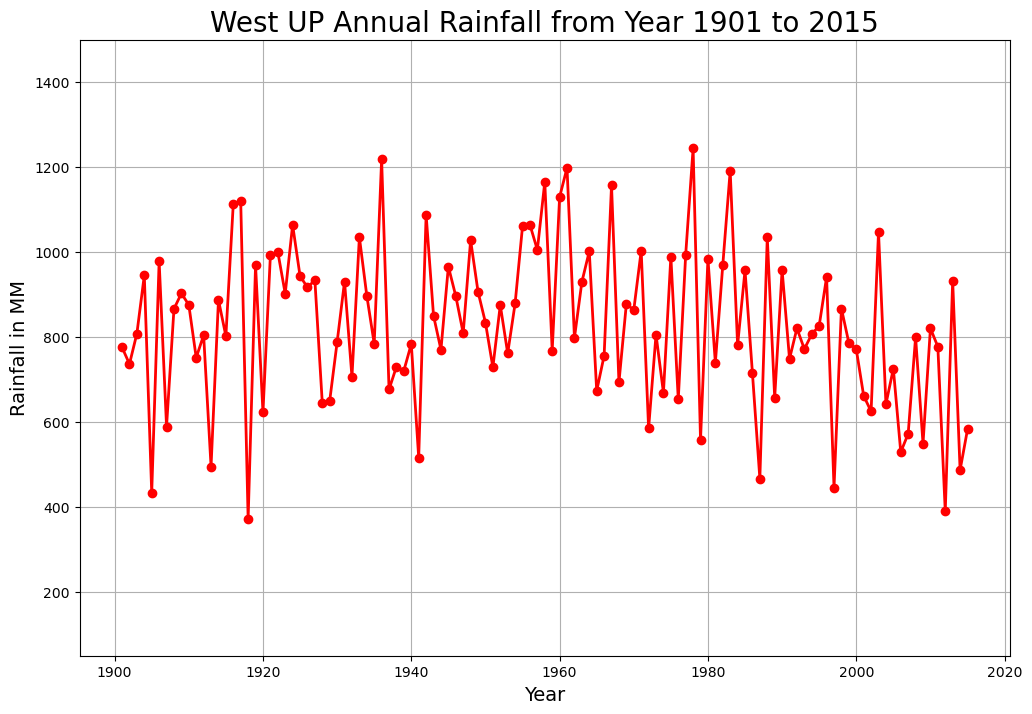

In [22]:
UP.groupby("YEAR").sum()['ANNUAL'].plot(ylim=(50,1500),color='r',marker='o',linestyle='-',linewidth=2,figsize=(12,8));
plt.xlabel('Year',size=14)
plt.ylabel('Rainfall in MM',size=14)
plt.title('West UP Annual Rainfall from Year 1901 to 2015',size=20)
plt.grid()
plt.show()

`From the Above graph we observe that:
 1)The lowest rainfall in West UP was noted in 1918 and 2012
 2)and, The highest was Rainfall was noted in 1978`

In [23]:
# analysis of rainfall data of rajasthan
Rajasthan = data.loc[((data['SUBDIVISION'] == 'WEST RAJASTHAN') | (data['SUBDIVISION'] == 'EAST RAJASTHAN'))]
Rajasthan.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
1817,WEST RAJASTHAN,1901,6.7,0.0,1.1,0.0,6.1,3.0,79.0,59.2,1.0,2.1,0.0,0.6,158.9,6.7,7.2,142.2,2.7
1818,WEST RAJASTHAN,1902,0.0,0.0,0.0,0.5,4.0,49.1,27.0,71.3,41.8,1.8,0.0,0.0,195.6,0.0,4.5,189.2,1.8
1819,WEST RAJASTHAN,1903,1.7,1.3,5.5,0.0,4.2,2.7,154.8,87.1,49.3,0.1,0.0,0.5,307.0,3.0,9.7,293.8,0.5
1820,WEST RAJASTHAN,1904,3.8,2.9,16.3,0.7,11.4,14.6,39.8,45.6,21.4,1.4,2.9,7.1,167.9,6.6,28.5,121.4,11.4
1821,WEST RAJASTHAN,1905,6.3,4.8,0.7,1.3,0.3,4.9,30.1,0.6,64.5,0.0,0.0,0.9,114.4,11.0,2.4,100.1,0.9


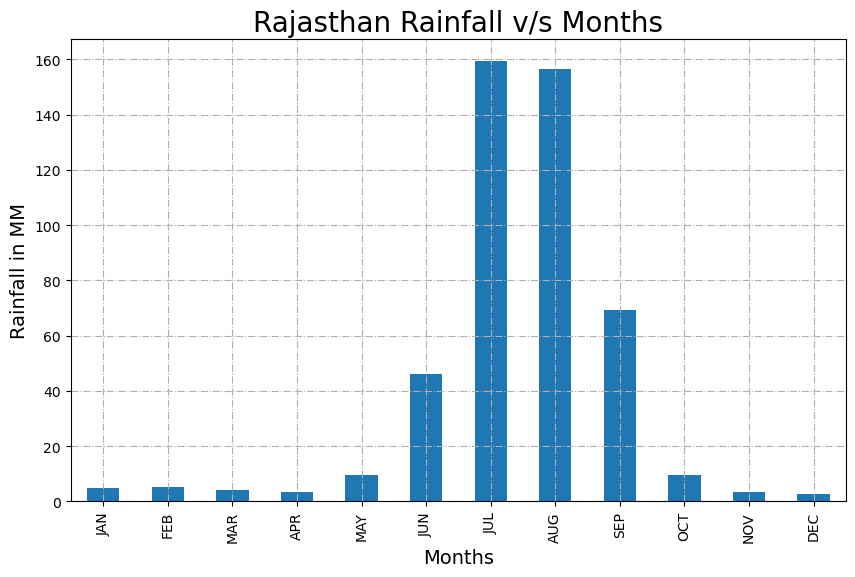

In [24]:
plt.figure(figsize=(10,6))
Rajasthan[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN','JUL','AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot(kind="bar",width=0.5,linewidth=2)
plt.title("Rajasthan Rainfall v/s Months",size=20)
plt.xlabel("Months",size=14)
plt.ylabel("Rainfall in MM",size=14)
plt.grid(axis="both",linestyle="-.")
plt.show()

`From the Above graph we observe that:-
 1)Rajasthan recieves good amount of rainfall in July and August`
 

C:\Users\hp\AppData\Local\Temp\ipykernel_12920\2487585599.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Rajasthan.groupby("YEAR").mean()['ANNUAL'].plot(ylim=(50,1500),color='r',marker='o',linestyle='-',linewidth=2,figsize=(12,8));


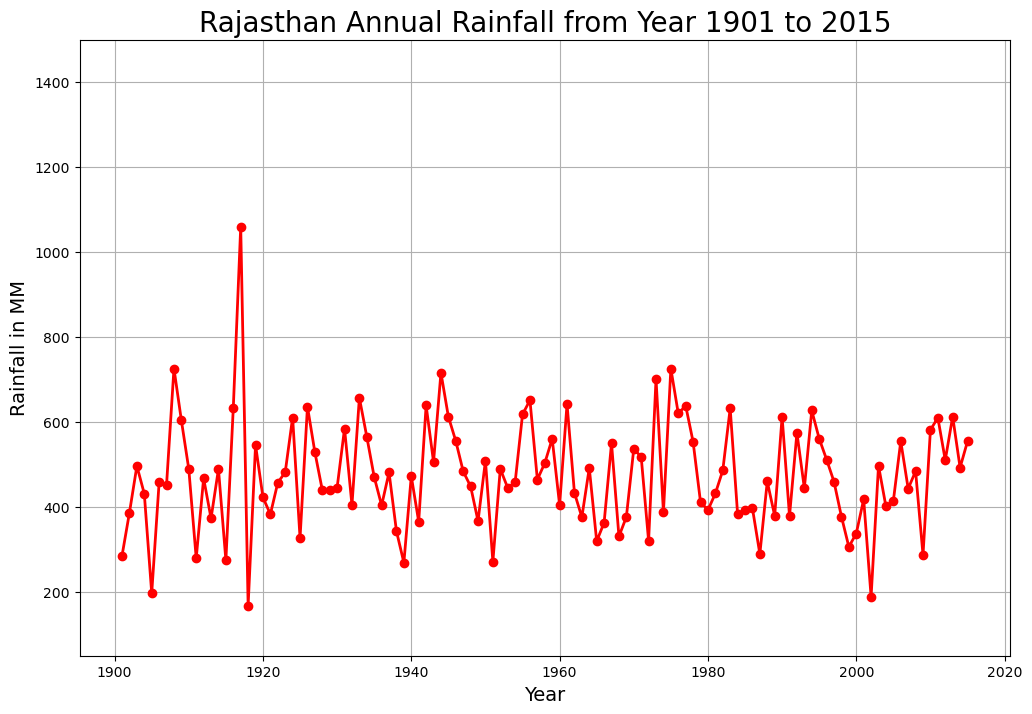

In [25]:
Rajasthan.groupby("YEAR").mean()['ANNUAL'].plot(ylim=(50,1500),color='r',marker='o',linestyle='-',linewidth=2,figsize=(12,8));
plt.xlabel('Year',size=14)
plt.ylabel('Rainfall in MM',size=14)
plt.title('Rajasthan Annual Rainfall from Year 1901 to 2015',size=20)
plt.grid()
plt.show()

`From the Above graph we note that:-
 1)The large amount of rainfall in Rajasthan was noted in year 1918`

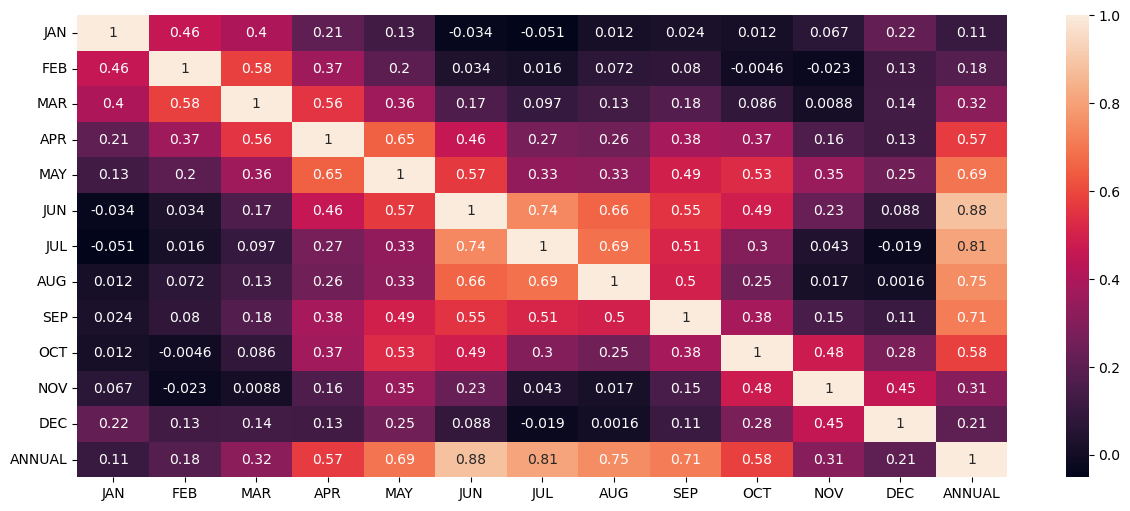

In [26]:
# correlation b/w each numeric attribute
plt.figure(figsize=(15,6))
sns.heatmap(data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

`The above heatmap shows the coorelation between different features in the dataset`

## Modelling 

In [27]:
data["SUBDIVISION"].nunique()

36

In [28]:
group = data.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
data=group.get_group(('WEST UTTAR PRADESH'))
data.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_12920\1286204754.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = data.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
1127,1901,51.4,25.6,9.5,0.7,5.6,23.8,201.9,374.3,67.7,7.6,0.0,7.9
1128,1902,4.6,4.6,0.6,4.8,7.2,54.5,325.9,180.6,143.1,9.6,0.9,0.2
1129,1903,13.4,0.4,1.2,0.0,8.2,32.7,145.4,279.1,150.4,177.3,0.0,0.4
1130,1904,6.3,2.0,29.7,0.4,24.8,68.5,358.8,311.1,97.1,2.7,15.7,28.2
1131,1905,32.3,26.6,14.8,3.6,7.1,18.9,139.8,95.0,92.2,0.2,0.0,2.9


In [29]:
df=data.melt(['YEAR']).reset_index()
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,51.4
1,1,1902,JAN,4.6
2,2,1903,JAN,13.4
3,3,1904,JAN,6.3
4,4,1905,JAN,32.3


In [30]:
df= df[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,51.4
115,115,1901,FEB,25.6
230,230,1901,MAR,9.5
345,345,1901,APR,0.7
460,460,1901,MAY,5.6


In [31]:
df.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [32]:
df.columns=['Index','Year','Month','Avg_Rainfall']

In [33]:
df.head()

,Index,Year,Month,Avg_Rainfall
0,0,1901,JAN,51.4
115,115,1901,FEB,25.6
230,230,1901,MAR,9.5
345,345,1901,APR,0.7
460,460,1901,MAY,5.6


In [34]:
Month_map={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(Month_map)
df.head(12)

,Index,Year,Month,Avg_Rainfall
0,0,1901,1,51.4
115,115,1901,2,25.6
230,230,1901,3,9.5
345,345,1901,4,0.7
460,460,1901,5,5.6
575,575,1901,6,23.8
690,690,1901,7,201.9
805,805,1901,8,374.3
920,920,1901,9,67.7
1035,1035,1901,10,7.6


In [35]:
df.drop(columns="Index",inplace=True)

In [36]:
df.head(2)

,Year,Month,Avg_Rainfall
0,1901,1,51.4
115,1901,2,25.6


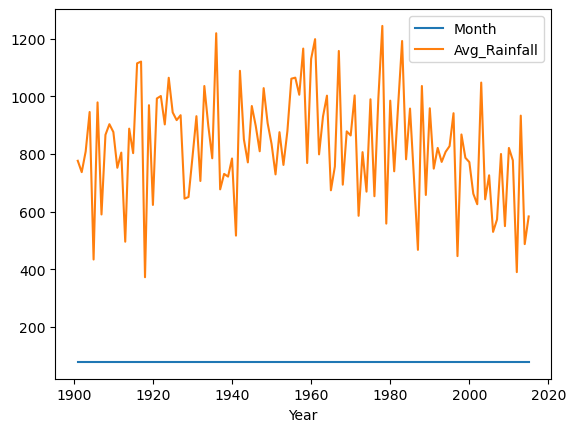

In [37]:
df.groupby("Year").sum().plot()
plt.show()

In [38]:
X=np.asanyarray(df[['Year','Month']]).astype('int')
y=np.asanyarray(df['Avg_Rainfall']).astype('int')
print(X.shape)
print(y.shape)

(1380, 2)
(1380,)


In [39]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Linear Regression Model

In [40]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [41]:
# predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [42]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)


-------Test Data--------
MAE: 78.82526709954887
MSE: 10905.124672779246
RMSE: 104.42760493652646

-------Train Data--------
MAE: 75.11036103969828
MSE: 9912.210250722379
RMSE: 99.56008362151158

-----Training Accuracy-------
3.2
-----Testing Accuracy--------
2.6


### Lasso Model

In [43]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# create a lasso object
lasso = Lasso(max_iter=100000)

# check for best alpha value using GridSearch
parameter={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,1e1,1e2,1e3,1e4,1e5,1e6,1e7]}
lasso_regressor=GridSearchCV(
    lasso,parameter,
    scoring='neg_mean_squared_error',
    cv=5
    )

In [44]:
lasso_regressor.fit(X_train,y_train)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.197e+06, tolerance: 7.650e+02
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(max_iter=100000),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10.0,
                                   100.0, 1000.0, 10000.0, 100000.0, 1000000.0,
                                   10000000.0]},
             scoring='neg_mean_squared_error')

In [45]:
print("Best Parameter for Lasso:",lasso_regressor.best_estimator_)

Best Parameter for Lasso: Lasso(alpha=1, max_iter=100000)


In [46]:
lasso=Lasso(alpha=100.0,max_iter=100000)

# fit into the object
lasso.fit(X_train,y_train)

Lasso(alpha=100.0, max_iter=100000)

In [47]:
# predicting 
y_train_predict=lasso.predict(X_train)
y_test_predict=lasso.predict(X_test)

In [48]:
from sklearn import metrics
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(lasso.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(lasso.score(X_test,y_test),3)*100)


-------Test Data--------
MAE: 81.14284793359822
MSE: 11219.919035761459
RMSE: 105.92411923524055

-------Train Data--------
MAE: 77.92292184988685
MSE: 10232.341255128711
RMSE: 101.15503573786484

-----Training Accuracy-------
0.0
-----Testing Accuracy--------
-0.2


### Ridge Model

In [49]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
 
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


{'alpha': 100}
-9975.848636371282


In [50]:
print("Best Parameter for Ridge:",ridge_regressor.best_estimator_)

Best Parameter for Ridge: Ridge(alpha=100)


In [51]:
ridge=Ridge(alpha=100.0)

# fit into the object
ridge.fit(X_train,y_train)

Ridge(alpha=100.0)

In [52]:
# predicting the train and test values 
y_train_predict=ridge.predict(X_train)
y_test_predict=ridge.predict(X_test)

In [53]:

from sklearn import metrics
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(ridge.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(ridge.score(X_test,y_test),3)*100)


-------Test Data--------
MAE: 78.8434377090823
MSE: 10905.309347718701
RMSE: 104.42848915750291

-------Train Data--------
MAE: 75.12921747654191
MSE: 9912.233064846705
RMSE: 99.56019819609996

-----Training Accuracy-------
3.2
-----Testing Accuracy--------
2.6


### Svm Model

In [54]:
from sklearn import preprocessing
from sklearn import svm

svm_regr = svm.SVC(kernel='rbf')
svm_regr.fit(X_train, y_train) 

SVC()

In [55]:
y_test_predict = svm_regr.predict(X_test)
y_train_predict = svm_regr.predict(X_train)

In [56]:
from sklearn import metrics
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))


print("\n-----Training Accuracy-------")
print(round(svm_regr.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(svm_regr.score(X_test,y_test),3)*100)


-------Test Data--------
MAE: 72.11352657004831
MSE: 16393.66425120773
RMSE: 128.03774541598165

-------Train Data--------
MAE: 66.94927536231884
MSE: 14718.096273291925
RMSE: 121.31816134978277

-----Training Accuracy-------
16.5
-----Testing Accuracy--------
17.599999999999998


### Random Forest Model

In [57]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [58]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [59]:

print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 34.12666935924944
MSE: 3012.4031175570058
RMSE: 54.88536341828307

-------Train Data--------
MAE: 26.071340183823935
MSE: 1844.9851987842935
RMSE: 42.95329089585911


In [60]:
print("-----------Training Accuracy------------")
print(round(random_forest_model.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(random_forest_model.score(X_test,y_test),3)*100)


-----------Training Accuracy------------
82.0
-----------Testing Accuracy------------
73.1


In [61]:
predicted = random_forest_model.predict([[2016,11]])

In [62]:
predicted

array([15.03599748])